   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

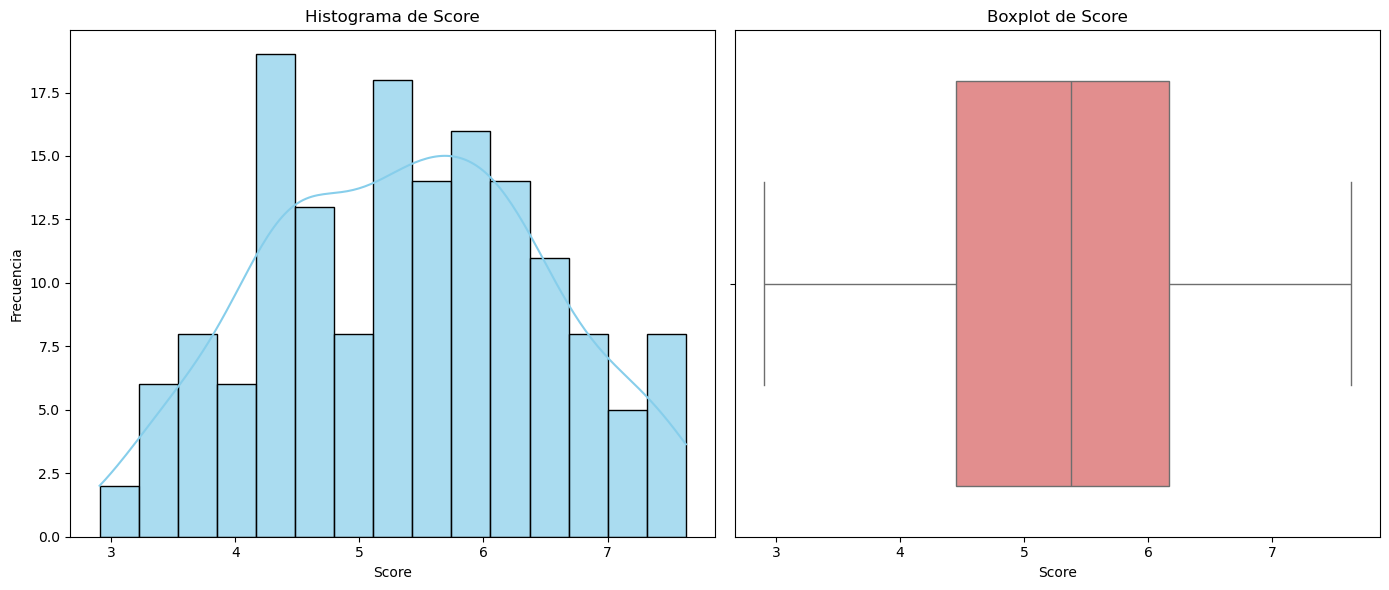


Análisis de Score:

- Media: 5.38
- Mediana: 5.38
- Desviación estándar: 1.12
- Mínimo: 2.90, Máximo: 7.63

Valores atípicos detectados en Score: 0 registros



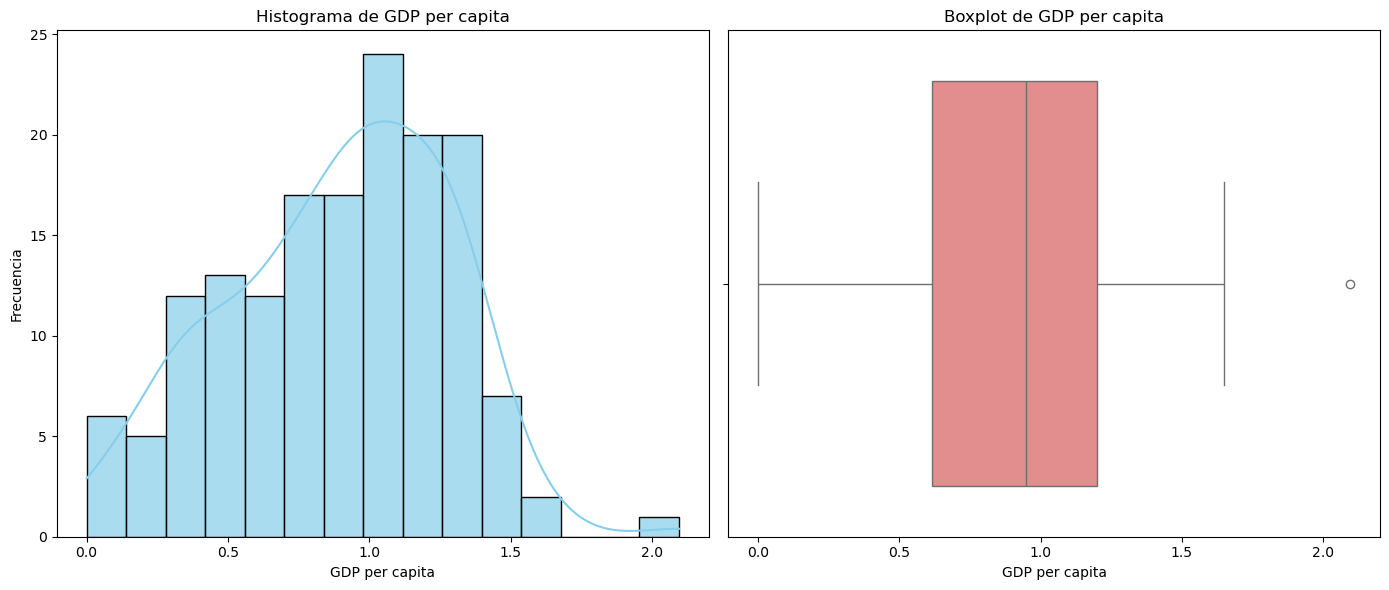


Análisis de GDP per capita:

- Media: 0.89
- Mediana: 0.95
- Desviación estándar: 0.39
- Mínimo: 0.00, Máximo: 2.10

Valores atípicos detectados en GDP per capita: 1 registros



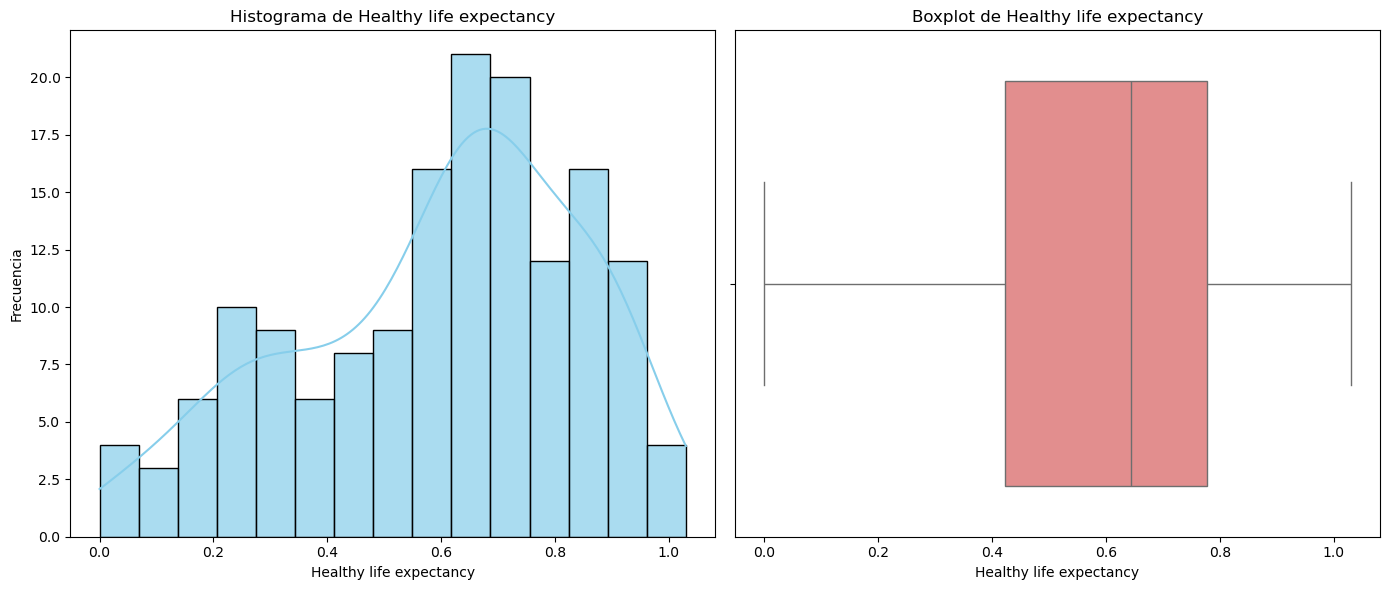


Análisis de Healthy life expectancy:

- Media: 0.60
- Mediana: 0.64
- Desviación estándar: 0.25
- Mínimo: 0.00, Máximo: 1.03

Valores atípicos detectados en Healthy life expectancy: 0 registros



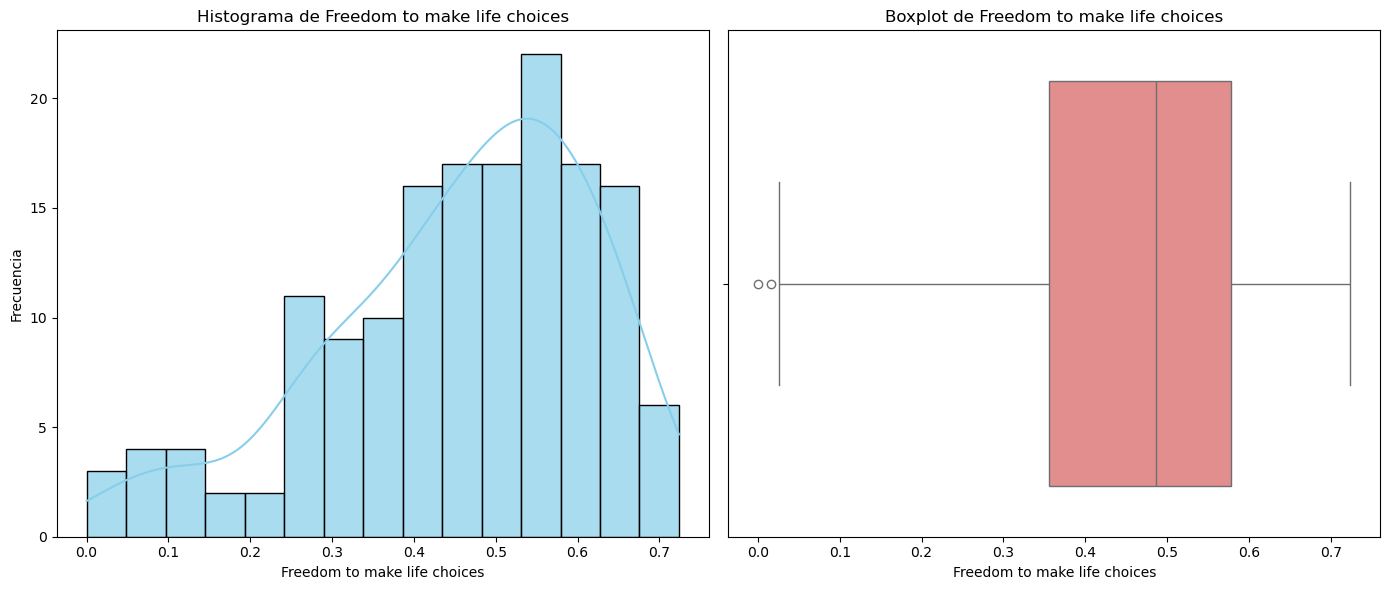


Análisis de Freedom to make life choices:

- Media: 0.45
- Mediana: 0.49
- Desviación estándar: 0.16
- Mínimo: 0.00, Máximo: 0.72

Valores atípicos detectados en Freedom to make life choices: 2 registros



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/2018.csv")

print(df.head()) 
print(df.info())  
print(df.describe())  

# Selección de las variables a analizar
variables = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']

# Crear histogramas y boxplots para cada variable
for var in variables:
    plt.figure(figsize=(14, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=15, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color='lightcoral')
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)

    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

    # Análisis inicial
    print(f"\nAnálisis de {var}:\n")
    print(f"- Media: {df[var].mean():.2f}")
    print(f"- Mediana: {df[var].median():.2f}")
    print(f"- Desviación estándar: {df[var].std():.2f}")
    print(f"- Mínimo: {df[var].min():.2f}, Máximo: {df[var].max():.2f}\n")

    # Detectar valores atípicos usando el rango intercuartil (IQR)
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Valores atípicos detectados en {var}: {outliers.shape[0]} registros\n")
